In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# matplotlib library load
import matplotlib.pyplot as plt


# plot 한글 보이게
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [8]:
data = pd.read_csv(r"../data/new_Data.csv", encoding='CP949')
data.columns = data.iloc[0]
data = data.iloc[1:]
data.set_index('Symbol Name', inplace=True)
data = data.replace(',', '', regex=True).astype(float)

j = 1

total_data = data.iloc[256*j:-256*(4-j),:]
total_data = total_data.dropna(axis=1)
train_data = total_data.iloc[:4119]
test_data = total_data.iloc[4119:]

C:\Users\user\AppData\Local\Temp\ipykernel_34348\1269477929.py:1: DtypeWarning: Columns (3,4,7,9,13,18,19,21,23,27,28,29,30,33,38,39,40,42,44,48,51,54,55,57,59,61,63,64,66,67,68,69,70,74,75,79,80,84,88,90,91,92,93,94,97,98,99,101,106,109,113,115,116,117,121,122,125,129,130,132,133,136,137,138,142,144,145,147,149,150,153,154,156,159,163,164,166,167,169,170,171,175,176,177,183,184,185,189,196,198,199,201,202,204,205,206,209,211,213,214,215,217,218,219,220,223,227,231,233,234,235,238,239,244,247,248,251,254,255,257,260,261,264,266,268,270,271,273,279,281,283,285,287,288,290,291,294,295,298,300,302,303,304,306,307,311,313,316,317,322,324,325,328,332,335,336,346,347,351,352,353,354,355,356,357,361,362,364,366,370,372,375,377,378,379,381,387,388,389,390,396,397,398,399,403,404,408,409,410,411,412,414,417,418,419,420,421,424,427,429,430,431,435,436,437,438,439,440,444,446,447,448,449,450,451,453,456,463,466,467,469,471,472,474,476,477,478,479,480,485,490,492,495,496,497,502,503,504,506,509,51

In [9]:
train_data

,삼성전자,SK하이닉스,현대차,기아,POSCO홀딩스,삼성SDI,카카오,현대모비스,삼성화재,한국전력,...,일정실업,메리츠화재,DL건설,롯데푸드,동성화학,폴루스바이오팜,메리츠증권,우리종금,부산가스,에코바이브
Symbol Name,,,,,,,,,,,,,,,,,,,,,
2000-05-25,6000.0,330759.0,11100.0,5800.0,87200.0,44150.0,12470.0,3795.0,24800.0,30550.0,...,13046.0,611.0,2457.0,28380.0,1714.0,1613309.0,566.0,707.0,7800.0,96027729.0
2000-05-26,5600.0,296407.0,9800.0,5600.0,84500.0,39950.0,11825.0,3230.0,22500.0,29000.0,...,12513.0,522.0,2096.0,28380.0,1528.0,1413855.0,481.0,602.0,7400.0,88825649.0
2000-05-29,5460.0,271870.0,10000.0,5800.0,80000.0,39900.0,11520.0,3100.0,23800.0,28250.0,...,12125.0,590.0,2201.0,30337.0,1526.0,1482023.0,554.0,690.0,7270.0,85224609.0
2000-05-30,5800.0,312111.0,10900.0,6400.0,83500.0,43700.0,12900.0,3480.0,25200.0,29700.0,...,13095.0,640.0,2315.0,32294.0,1620.0,1590587.0,551.0,670.0,7600.0,90025996.0
2000-05-31,6160.0,345481.0,12100.0,6180.0,85000.0,43000.0,14441.0,3770.0,25700.0,30300.0,...,13434.0,632.0,2362.0,32490.0,1761.0,1666329.0,612.0,720.0,8000.0,92426689.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-10,37240.0,49750.0,152000.0,40500.0,249500.0,116500.0,16524.0,276500.0,266500.0,42250.0,...,34477.0,15100.0,15950.0,604786.0,19150.0,4100.0,3485.0,651.0,35900.0,11700.0
2017-01-11,38280.0,51600.0,148500.0,40300.0,269000.0,116500.0,16765.0,274500.0,262000.0,43200.0,...,34128.0,15000.0,15350.0,606743.0,18900.0,4060.0,3615.0,655.0,35400.0,12600.0
2017-01-12,38800.0,50600.0,148000.0,40550.0,266500.0,116500.0,16503.0,279000.0,267500.0,43850.0,...,34302.0,15450.0,15450.0,605765.0,18550.0,4175.0,3560.0,642.0,35000.0,12750.0


In [10]:
test_data

,삼성전자,SK하이닉스,현대차,기아,POSCO홀딩스,삼성SDI,카카오,현대모비스,삼성화재,한국전력,...,일정실업,메리츠화재,DL건설,롯데푸드,동성화학,폴루스바이오팜,메리츠증권,우리종금,부산가스,에코바이브
Symbol Name,,,,,,,,,,,,,,,,,,,,,
2017-01-17,36960.0,49300.0,153500.0,40700.0,265000.0,114000.0,16503.0,280000.0,275500.0,44150.0,...,33895.0,15200.0,15200.0,617508.0,18000.0,4370.0,3710.0,656.0,34450.0,15100.0
2017-01-18,36940.0,48850.0,154000.0,41150.0,268000.0,112500.0,16342.0,282500.0,276000.0,43600.0,...,34244.0,15500.0,14800.0,619465.0,18000.0,4330.0,3685.0,657.0,34450.0,16100.0
2017-01-19,37480.0,49600.0,152000.0,40800.0,278000.0,105500.0,16584.0,277000.0,270000.0,43350.0,...,34012.0,15250.0,14950.0,614572.0,17750.0,4290.0,3600.0,650.0,34350.0,16300.0
2017-01-20,37200.0,49150.0,153000.0,39750.0,273000.0,107500.0,16201.0,278500.0,272000.0,43250.0,...,34012.0,15250.0,14650.0,629252.0,18200.0,4265.0,3580.0,644.0,34700.0,16400.0
2017-01-23,38060.0,50800.0,149000.0,39400.0,270500.0,106500.0,15919.0,272500.0,273500.0,42900.0,...,33953.0,15150.0,14650.0,621423.0,17950.0,4150.0,3575.0,627.0,34500.0,15800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,81200.0,133000.0,218000.0,81300.0,308500.0,635000.0,97348.0,284500.0,188500.0,23100.0,...,18081.0,17750.0,33650.0,370000.0,17200.0,1225.0,4320.0,664.0,55800.0,6170.0
2021-03-26,81500.0,135000.0,215500.0,80600.0,318000.0,647000.0,99355.0,283500.0,186000.0,23250.0,...,18314.0,17750.0,34050.0,375000.0,17400.0,1225.0,4370.0,665.0,57600.0,6600.0
2021-03-29,81600.0,132000.0,215500.0,81000.0,327000.0,651000.0,97849.0,284000.0,187000.0,23350.0,...,18314.0,17850.0,35200.0,380500.0,17900.0,1225.0,4365.0,656.0,57600.0,6410.0


In [6]:
test_data

,삼성전자,SK하이닉스,현대차,기아,POSCO홀딩스,삼성SDI,현대모비스,삼성화재,한국전력,HMM,...,비비안,에넥스,카프로,동원수산,한국주강,금호전기,한솔PNS,한창,SHD,일정실업
Symbol Name,,,,,,,,,,,,,,,,,,,,,
2016-01-05,24160.0,30600.0,143500.0,50700.0,169000.0,115000.0,237000.0,305000.0,50700.0,24876.0,...,4193.0,3450.0,12975.0,8760.0,3130.0,12891.0,1737.0,16734.0,18200.0,34128.0
2016-01-06,23500.0,30750.0,140000.0,49400.0,168500.0,114500.0,234500.0,311500.0,50800.0,23716.0,...,4193.0,3345.0,13225.0,8420.0,3080.0,12791.0,1675.0,15762.0,17710.0,32849.0
2016-01-07,23260.0,30200.0,137500.0,49300.0,164000.0,111000.0,237000.0,302500.0,50300.0,22620.0,...,4172.0,3350.0,13025.0,8510.0,3075.0,12841.0,1653.0,15104.0,17977.0,32907.0
2016-01-08,23420.0,29700.0,136500.0,48500.0,165000.0,113000.0,238500.0,303500.0,49900.0,21750.0,...,4138.0,3285.0,12525.0,8450.0,3000.0,12593.0,1653.0,14979.0,17666.0,33430.0
2016-01-11,23040.0,28650.0,140000.0,49600.0,161500.0,111500.0,241000.0,302500.0,50700.0,20848.0,...,4159.0,3185.0,12050.0,8430.0,2975.0,12692.0,1664.0,14321.0,17799.0,33895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-07,81300.0,179600.0,242000.0,115700.0,406500.0,435000.0,228500.0,310000.0,21850.0,15800.0,...,1010.0,484.0,3660.0,6160.0,2350.0,730.0,1226.0,1254.0,18210.0,14210.0
2024-05-08,81300.0,178000.0,242000.0,116000.0,403500.0,437000.0,232000.0,316000.0,21500.0,16270.0,...,1010.0,484.0,3660.0,6150.0,2415.0,730.0,1228.0,1254.0,18190.0,13530.0
2024-05-09,79700.0,175400.0,237000.0,111700.0,398000.0,430500.0,226000.0,316000.0,21800.0,17300.0,...,1004.0,484.0,3660.0,6160.0,2455.0,727.0,1250.0,1254.0,18210.0,14140.0


In [ ]:
with open('custum_4.json', 'r', encoding='utf-8') as f:
    groups = json.load(f)

In [ ]:
groups

{'KMeans': [['동원산업', '사조대림', '사조산업', '신라교역', 'CJ씨푸드', '사조오양', '한성기업', '동원수산'],
  ['한온시스템', '에스엘', '화신', '서연', '에스제이지세종'],
  ['휴스틸', 'NI스틸', '동양철관', '대호에이엘', '하이스틸', '한일철강', '부국철강', 'DSR제강', '문배철강'],
  ['신한지주', '삼성화재', '한국전력', 'SK텔레콤', '기업은행', 'KT', 'LG유플러스', '강원랜드', '한국가스공사'],
  ['삼성전자', 'SK하이닉스', '삼성SDI', 'LG전자', 'LG', '삼성전기'],
  ['현대차', '기아', '현대모비스', '한국앤컴퍼니'],
  ['삼화콘덴서', '삼화전기', '삼화전자']],
 'DBSCAN': [],
 'Hierarchical': [['신한지주',
   '삼성화재',
   '한국전력',
   'SK텔레콤',
   '기업은행',
   'KT',
   'LG유플러스',
   '강원랜드',
   '한국가스공사',
   '코리안리'],
  ['휴스틸', 'NI스틸', '동양철관', '대호에이엘', '하이스틸', '한일철강', '부국철강', 'DSR제강', '문배철강'],
  ['삼화콘덴서', '삼화전기', '삼화전자'],
  ['동원산업', '사조대림', '사조산업', '신라교역', 'CJ씨푸드', '사조오양', '한성기업', '동원수산'],
  ['현대차', '기아', '현대모비스'],
  ['삼성전자', 'SK하이닉스', '삼성SDI', 'LG전자', '삼성전기']]}

In [ ]:
test_num = 5
algorithm = "Hierarchical"
df = train_data[groups[algorithm][test_num]]

In [ ]:
def engle_granger_test(cols):
    y1 = df[cols[0]]
    y2 = df[cols[1]]
    model = OLS(y1,y2).fit()  
    residuals = model.resid  

    adf_test = adfuller(residuals)  
    adf_statistic = adf_test[0]
    critical_values = adf_test[4]
    p_value = adf_test[1]
    result = {
        'columns': cols,
        'adf_statistic': adf_test[0],  # ADF 통계량
        'p_value': adf_test[1],  # p-값
        'critical_values': adf_test[4],  # 임계값
    }
    return result

def get_pair(df):
    import itertools
    all_combinations  = list(itertools.combinations(df.columns, 2))

    results = []  # 결과를 저장할 리스트
    for combination in all_combinations:
        result = engle_granger_test(list(combination))
        results.append(result)

    results_sorted = sorted(results, key=lambda x: x['p_value']) 
    return results_sorted

results_sorted = get_pair(df)

In [ ]:
def asset_selection(sets):    
    first_pair = sets[0]['columns']  # 가장 연관성이 큰 첫 번째 쌍
    asset1 = set()  # 첫 번째 그룹
    asset2 = set()  # 두 번째 그룹

    asset1.add(first_pair[0])  # 첫 번째 요소를 asset1에 추가
    asset2.add(first_pair[1])  # 두 번째 요소를 asset2에 추가
    # 나머지 쌍을 그룹에 배치
    for pair in sets[1:]:
        a, b = pair['columns']

        if a in asset1 and b in asset2:
            continue  # 이미 다른 그룹에 배치된 경우 건너뜀
        elif a in asset2 and b in asset1:
            continue  # 이미 다른 그룹에 배치된 경우 건너뜀
        elif a in asset1 and b not in asset1:
            asset2.add(b)  # a가 asset1에 있으면 b를 asset2에 배치
        elif a in asset2 and b not in asset2:
            asset1.add(b)  # a가 asset2에 있으면 b를 asset1에 배치
        elif b in asset1 and a not in asset1:
            asset2.add(a)  # b가 asset1에 있으면 a를 asset2에 배치
        elif b in asset2 and a not in asset2:
            asset1.add(a)  # b가 asset2에 있으면 a를 asset1에 배치
        elif (a not in asset1 and b not in asset2) or (b not in asset1 and a not in asset2):
            # a, b 모두 기존 그룹에 속하지 않은 경우 서로 다른 그룹에 배치
            asset1.add(a)
            asset2.add(b)
        else:
            sets.pop()
            continue

    # 결과 출력
    print("Asset 1:", list(asset1))  # 첫 번째 그룹의 요소
    print("Asset 2:", list(asset2))  # 두 번째 그룹의 요소
    return asset1, asset2

def select_result(results_sorted):
    selected_results = [
        result for result in results_sorted 
        if result['adf_statistic'] < result['critical_values']['5%']
    ]
    selected_results
    asset1, asset2 = asset_selection(selected_results)
    selected_results
    filtered_results=[]
    for result in selected_results:
        asset1_name, asset2_name = result['columns']
        current_columns = result['columns']
        if not (all(column in asset1 for column in current_columns) or all(column in asset2 for column in current_columns)):
            filtered_results.append(result)
        selected_results = filtered_results
        if asset1_name not in asset1 or asset2_name not in asset2:
            # 두 자산의 순서가 리스트 순서와 일치하지 않는 경우, 순서를 바꿉니다.
            result['columns'] = [asset1_name, asset2_name]
    return selected_results, asset1, asset2

selected_results, Asset1, Asset2 = select_result(results_sorted)
selected_results

IndexError: list index out of range

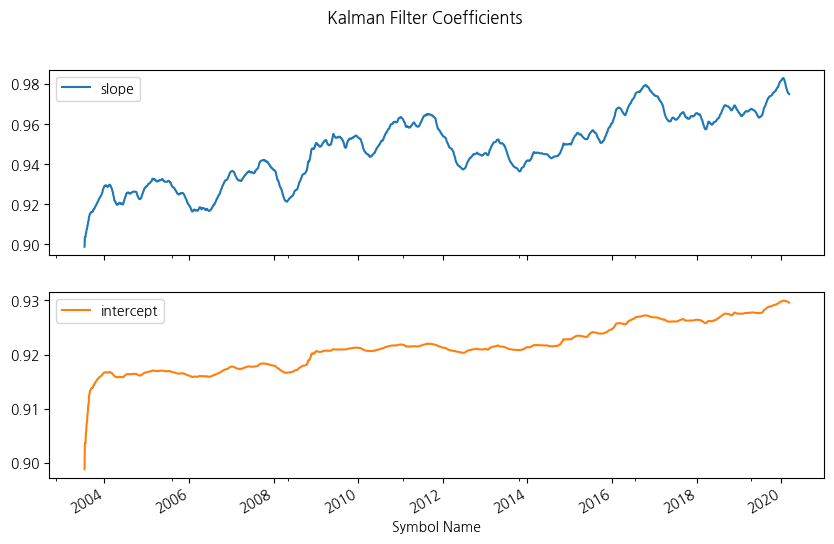

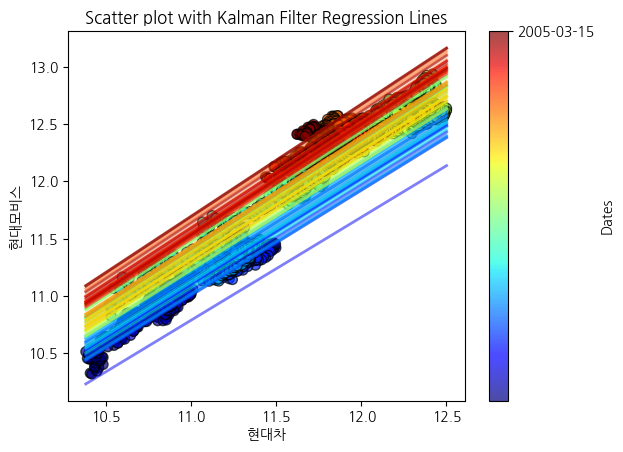

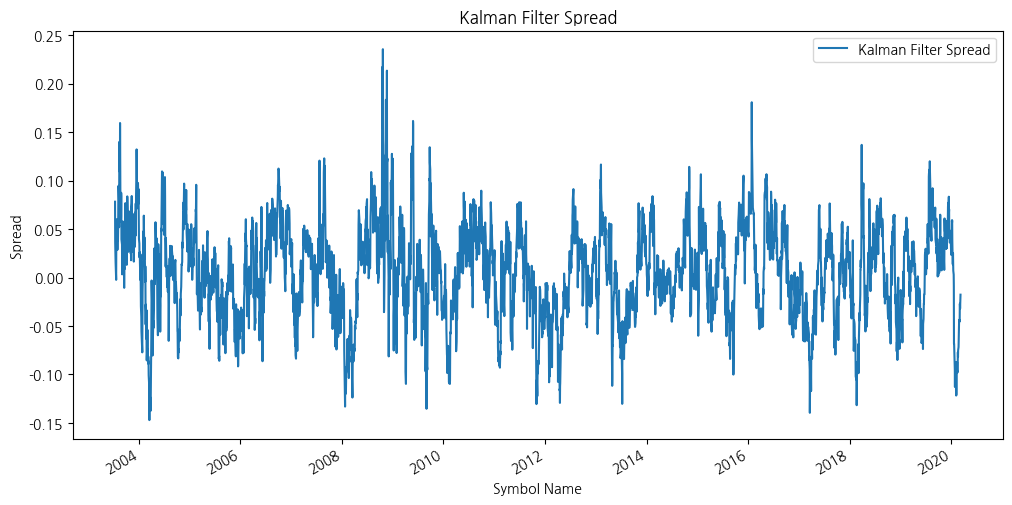

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pykalman import KalmanFilter

def kalman_graph(selected_results, df):
    df.index = pd.to_datetime(df.index)
    stat_all = []
    spread_all = []

    for i in range(len(selected_results)):
        tickers = selected_results[i]['columns']
        log_price_1 = np.log(df[tickers[0]].values)
        log_price_2 = np.log(df[tickers[1]].values)

        obs_mat = sm.add_constant(log_price_1, prepend=False)[:, np.newaxis]

        delta = 1e-5
        trans_cov = delta / (1 - delta) * np.eye(2)

        kf = KalmanFilter(n_dim_obs=1, n_dim_state=2,
                          initial_state_mean=np.zeros(2),
                          initial_state_covariance=np.ones((2, 2)),
                          transition_matrices=np.eye(2),
                          observation_matrices=obs_mat,
                          observation_covariance=1.0,
                          transition_covariance=trans_cov)

        state_means, state_covs = kf.filter(log_price_2)
        beta_kf = pd.DataFrame(state_means, columns=['slope', 'intercept'])
        beta_kf.index = df.index

        # Plot regression coefficients
        beta_kf.plot(subplots=True, figsize=(10, 6), title='Kalman Filter Coefficients')
        plt.show()

        # Plot scatter and regression lines over time
        dates = df.index[::int(len(df)/10)]
        colors = np.linspace(0.1, 1, len(df))
        plt.scatter(log_price_1, log_price_2, s=50, c=colors, cmap='jet', edgecolor='k', alpha=0.7)
        plt.colorbar(ticks=range(len(dates)), label='Dates').ax.set_yticklabels([p.date() for p in dates])
        plt.xlabel(tickers[0])
        plt.ylabel(tickers[1])

        step = 50
        xi = np.linspace(log_price_1.min(), log_price_1.max(), 2)
        colors_l = np.linspace(0.1, 1, len(state_means[::step]))
        for j, b in enumerate(state_means[::step]):
            plt.plot(xi, b[0] * xi + b[1], alpha=0.5, lw=2, color=plt.get_cmap('jet')(colors_l[j]))
        plt.title('Scatter plot with Kalman Filter Regression Lines')
        plt.show()

        # Calculate and plot spread
        spread_kf = log_price_2 - log_price_1 * beta_kf['slope'] - beta_kf['intercept']
        spread_all.append(spread_kf)
        spread_kf.plot(label='Kalman Filter Spread', figsize=(12, 6))
        plt.legend()
        plt.title('Kalman Filter Spread')
        plt.ylabel('Spread')
        plt.show()

        stat_all.append([tickers, state_means, state_covs])

    return stat_all, spread_all

# Example usage
# Assuming selected_results and df are already defined
stat_all, spread_all = kalman_graph(selected_results, df)


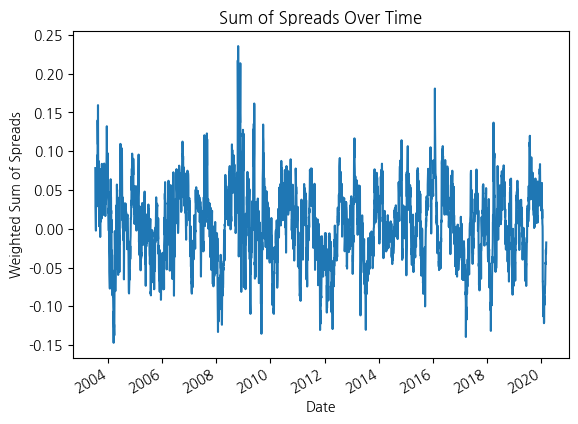

Weights: [1.]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_spread(selected_results, spread_all):
    # 로그 변환된 역 p-value 계산 및 비중 설정
    total_log_inverse_p_value = sum(np.log(1 / item['p_value']) for item in selected_results)
    
    for item in selected_results:
        item['log_inverse_p_value'] = np.log(1 / item['p_value'])
    
    # 최종 비중 계산
    for item in selected_results:
        item['ratio'] = item['log_inverse_p_value'] / total_log_inverse_p_value
    
    # 비중 배열 생성
    ratios = np.array([item['ratio'] for item in selected_results])  
    
    # 스프레드 시리즈 생성 및 확인
    spread_series = []
    for spread in spread_all:
        if isinstance(spread, pd.Series):
            spread_series.append(spread)
        elif isinstance(spread, list) and isinstance(spread[0], pd.Series):
            spread_series.extend(spread)
    
    # 가중 스프레드 계산
    weighted_spreads = [spread_series[i] * ratios[i] for i in range(len(spread_series))]
    
    # 가중 합 스프레드 계산
    if weighted_spreads:
        weighted_sum_spreads = pd.concat(weighted_spreads, axis=1).sum(axis=1)
        weighted_sum_spreads_series = pd.Series(weighted_sum_spreads)
    
        # 날짜 인덱스 설정 (spread_all의 첫 번째 항목의 인덱스를 사용)
        weighted_sum_spreads_series.index = spread_series[0].index
    
        # 그래프 그리기
        weighted_sum_spreads_series.plot()
        plt.title('Sum of Spreads Over Time')
        plt.xlabel('Date')
        plt.ylabel('Weighted Sum of Spreads')
        plt.show()
    
        return weighted_sum_spreads_series, ratios
    else:
        print("No valid spreads to concatenate.")
        return pd.Series(dtype=float)

# Example usage
# Assuming selected_results and spread_all are already defined
weighted_sum_spreads_series, weights = get_spread(selected_results, spread_all)

# weights 출력
print("Weights:", weights)

먼저, 각 $p$-값의 역수에 로그를 씌운 값을 계산합니다:

$$
\log \left( \frac{1}{p_i} \right)
$$

모든 항목에 대해 위 값을 합산합니다:

$$
\text{Total} = \sum_{i=1}^{n} \log \left( \frac{1}{p_i} \right)
$$

각 항목의 비중은 다음과 같이 계산됩니다:

$$
\text{weight}_i = \frac{\log \left( \frac{1}{p_i} \right)}{\text{Total}}
$$

이때, $\text{비중}_i$의 총합은 1이 됩니다:

$$
\sum_{i=1}^{n} \text{weight}_i = 1
$$



---

In [ ]:
def adftest(data):
    #adf 검정!
    result = adfuller(data)

    print('정상성이 있는지 판단 : ')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    return key

def ARIMA_model(data):
    #델타yt의 경우와 그냥 yt의 경우에 감마의 값에 따라 평균회귀 가능성이 어떻게 달라지는지 조심하세요
    model = ARIMA(data, order=(1, 0, 0))
    model_fit = model.fit()
    print(f'λ 값의 유도(델타yt가 아닌 그냥 yt임 주의!!) : { model_fit.params[1] }')
    half = -np.log(2)/(model_fit.params[1]-1)
    print(f'반감기 : {half}')

    display(model_fit.summary())
    return half

def RS_func(data):
    L = np.log10(data[1:].values / data[:-1].values)
    nan_inf_indices = np.isnan(L) | np.isinf(L)
    L = L[~nan_inf_indices]
    Z = np.mean(L)
    C = np.cumsum(L-Z)
    R = max(C) - min(C)
    S = np.std(L)
    return R/S

def hurst_func(data):
    min_window = 10
    max_window = len(data) - 1
    by_factor = np.log10(2.0)
    window_sizes = list(map(lambda x: int(10 ** x),np.arange(np.log10(min_window), np.log10(max_window), by_factor)))
    window_sizes.append(len(data))

    RS = []
    for w in window_sizes:
        rs = []
        for start in range(0, len(data), w):
            if (start + w) > len(data):
                break
            res = RS_func(data[start:start + w].astype(np.float64))
            if res != 0:
                rs.append(res)
        RS.append(np.mean(rs))

    lm1 = LinearRegression().fit(np.log10(window_sizes).reshape(-1, 1),np.log10(RS).reshape(-1, 1))
    hurst_exp = lm1.coef_[0][0]
    print(f'H = {hurst_exp}')
    return hurst_exp
key = adftest(weighted_sum_spreads_series)
half=ARIMA_model(weighted_sum_spreads_series)
H = hurst_func(weighted_sum_spreads_series)

정상성이 있는지 판단 : 
ADF Statistic: -10.992407
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


λ 값의 유도(델타yt가 아닌 그냥 yt임 주의!!) : 0.9278361909476509
반감기 : 9.605191156929124


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                 ARIMA(1, 0, 0)   Log Likelihood               10720.561
Date:                Mon, 20 May 2024   AIC                         -21435.121
Time:                        12:19:54   BIC                         -21416.151
Sample:                             0   HQIC                        -21428.407
                               - 4119                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0052      0.004      1.330      0.183      -0.002       0.013
ar.L1          0.9278      0.005    194.437      0.000       0.918       0.937
sigma2         0.0003   4.73e-06     67.807      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1053.91
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

H = 0.44634609083909627


C:\Users\user\AppData\Local\Temp\ipykernel_3180\1511956018.py:25: RuntimeWarning: invalid value encountered in log10
  L = np.log10(data[1:].values / data[:-1].values)
C:\Users\user\AppData\Local\Temp\ipykernel_3180\1511956018.py:25: RuntimeWarning: invalid value encountered in log10
  L = np.log10(data[1:].values / data[:-1].values)
C:\Users\user\AppData\Local\Temp\ipykernel_3180\1511956018.py:25: RuntimeWarning: invalid value encountered in log10
  L = np.log10(data[1:].values / data[:-1].values)
C:\Users\user\AppData\Local\Temp\ipykernel_3180\1511956018.py:25: RuntimeWarning: invalid value encountered in log10
  L = np.log10(data[1:].values / data[:-1].values)
C:\Users\user\AppData\Local\Temp\ipykernel_3180\1511956018.py:25: RuntimeWarning: invalid value encountered in log10
  L = np.log10(data[1:].values / data[:-1].values)
C:\Users\user\AppData\Local\Temp\ipykernel_3180\1511956018.py:25: RuntimeWarning: invalid value encountered in log10
  L = np.log10(data[1:].values / data[:-1].

---

In [ ]:
mean_spread = weighted_sum_spreads_series.mean()
std_spread = weighted_sum_spreads_series.std()
upper_bound = mean_spread + 2 * std_spread
upper_stop_bound = mean_spread + 3 * std_spread
lower_bound = mean_spread - 2 * std_spread
lowwer_stop_bound = mean_spread - 3 * std_spread
close_range = std_spread * 0.1
print(upper_bound,upper_stop_bound,lower_bound,lowwer_stop_bound)

0.10141330304851479 0.14953654371554814 -0.0910796596196187 -0.13920290028665205


---

In [ ]:
df = test_data[groups[algorithm][test_num]]

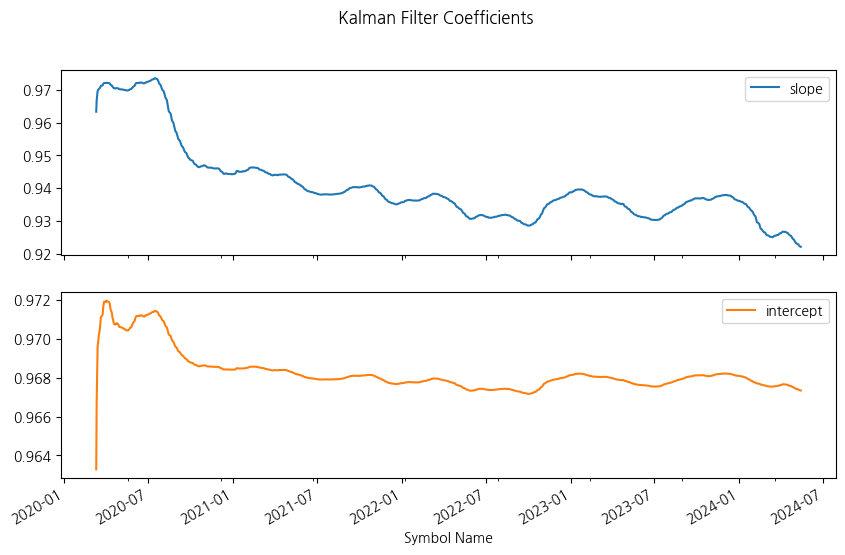

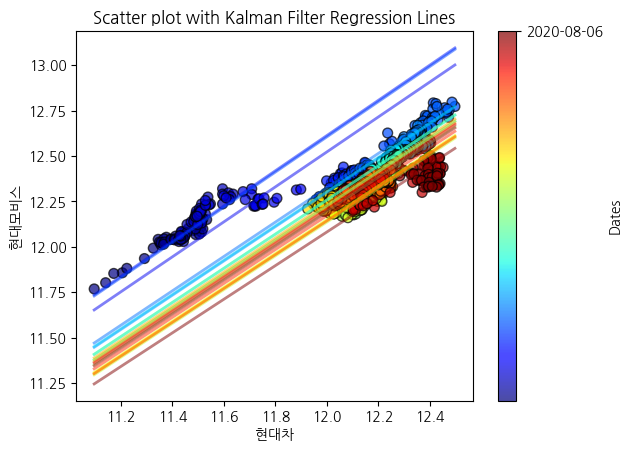

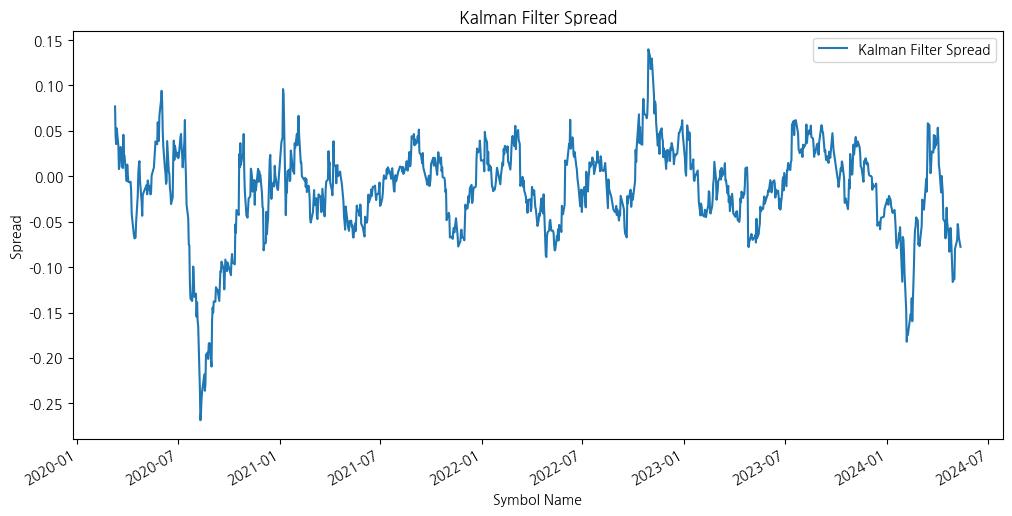

In [ ]:
stat_all, spread_all = kalman_graph(selected_results, df)

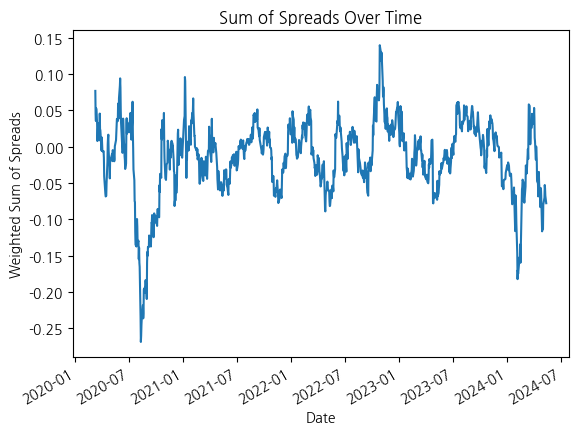

In [ ]:
weighted_sum_spreads_series = get_spread(selected_results, spread_all)

In [ ]:
weighted_sum_spreads_series[0].items()

In [ ]:
# 상태 플래그
def get_signal(weighted_sum_spreads_series,mean_spread, close_range, upper_stop_bound, lowwer_stop_bound,half,Asset1,Asset2):
    above = False
    below = False
    keep = False
    signals = []
    startday=0

    for date, value in weighted_sum_spreads_series.items():
        day = weighted_sum_spreads_series.index.get_loc(date)
        if value > upper_bound:
            above = True
        elif value < lower_bound:
            below = True
        elif keep and ((mean_spread - close_range <= value <= mean_spread + close_range) or value > upper_stop_bound or value < lowwer_stop_bound or day - startday > half):
            for index, result in enumerate(selected_results):
                asset1_name = result['columns'][0]
                asset2_name = result['columns'][1]
                if asset1_name in Asset1 and asset2_name in Asset2:
                    signals.append({
                        'Date': date,
                        'asset1': asset1_name,
                        'asset2': asset2_name,
                        'Investment Amount': result['ratio'],
                        'Investment Type': 'Close'
                    })
                else:
                    signals.append({
                        'Date': date,
                        'asset1': asset2_name,
                        'asset2': asset1_name,
                        'Investment Amount': result['ratio'],
                        'Investment Type': 'Close'
                    })
            keep = False
            below = False
            above = False
        elif (keep == 0) and above and value <= upper_bound:
            for index, result in enumerate(selected_results):
                asset1_name = result['columns'][0]
                asset2_name = result['columns'][1]
                if asset1_name in Asset1 and asset2_name in Asset2:
                    signals.append({
                        'Date': date,
                        'asset1': asset1_name,
                        'asset2': asset2_name,
                        'Investment Amount': result['ratio'],
                        'Investment Type': 'Long'
                    })
                else:
                    signals.append({
                        'Date': date,
                        'asset1': asset2_name,
                        'asset2': asset1_name,
                        'Investment Amount': result['ratio'],
                        'Investment Type': 'Short'
                    })
            above = False
            keep = True
            startday = weighted_sum_spreads_series.index.get_loc(date)
        elif (keep == 0) and below and value >= lower_bound:
            for index, result in enumerate(selected_results):
                asset1_name = result['columns'][0]
                asset2_name = result['columns'][1]
                if asset1_name in Asset1 and asset2_name in Asset2:
                    signals.append({
                        'Date': date,
                        'asset1': asset1_name,
                        'asset2': asset2_name,
                        'Investment Amount': result['ratio'],
                        'Investment Type': 'Short'
                    })
                else:
                    signals.append({
                        'Date': date,
                        'asset1': asset2_name,
                        'asset2': asset1_name,
                        'Investment Amount': result['ratio'],
                        'Investment Type': 'Long'
                    })
            below = False
            keep = True
            startday = weighted_sum_spreads_series.index.get_loc(date)

    # 데이터프레임으로 변환
    signals_df = pd.DataFrame(signals)
    return signals_df
signals_df = get_signal(weighted_sum_spreads_series[0],mean_spread, close_range, upper_stop_bound, lowwer_stop_bound,half,Asset1,Asset2)
signals_df

,Date,asset1,asset2,Investment Amount,Investment Type
0,2020-10-07,현대차,현대모비스,1.0,Short
1,2020-10-21,현대차,현대모비스,1.0,Close
2,2022-11-07,현대차,현대모비스,1.0,Long
3,2022-11-21,현대차,현대모비스,1.0,Close
4,2024-01-30,현대차,현대모비스,1.0,Short
5,2024-02-20,현대차,현대모비스,1.0,Close
6,2024-05-03,현대차,현대모비스,1.0,Short


In [ ]:
initial_capital = 100000000  # 1억

# 자본 변동을 추적할 DataFrame 준비
capital_df = pd.DataFrame(index=df.index)
capital_df['capital'] = initial_capital
signals_df['Date'] = signals_df['Date'].astype(str)
# 포지션을 추적할 딕셔너리
position_all = []

In [ ]:
selected_results

[{'columns': ['현대차', '현대모비스'],
  'adf_statistic': -2.880690655972535,
  'p_value': 0.04763992844599814,
  'critical_values': {'1%': -3.431940129748071,
   '5%': -2.8622426321465793,
   '10%': -2.567144017648735},
  'log_inverse_p_value': 3.0440840364693367,
  'ratio': 1.0}]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pykalman import KalmanFilter

# 초기 자본 설정
initial_capital = 100000000  # 1억

# 자본 변동을 추적할 DataFrame 준비
capital_df = pd.DataFrame(index=df.index)
capital_df['capital'] = initial_capital

# signals_df의 Date를 datetime 형식으로 변환
signals_df['Date'] = pd.to_datetime(signals_df['Date'])

# 포지션을 추적할 딕셔너리
position_all = []

# 각 신호를 처리
for index, signal in signals_df.iterrows():
    date = signal['Date']
    asset1 = signal['asset1']
    asset2 = signal['asset2']
    investment_ratio = signal['Investment Amount']
    trade_type = signal['Investment Type']

    # selected_results에서 해당 페어의 인덱스 찾기
    pair_index = next((i for i, pairs in enumerate(selected_results) if pairs['columns'] == [asset1, asset2] or pairs['columns'] == [asset2, asset1]), None)
    if pair_index is None:
        continue  # 해당 페어를 찾지 못하면 다음 신호로 넘어감

    # 자본에서 투자할 금액 계산
    investment_amount = initial_capital * investment_ratio

    # 헷지 비율 데이터 생성
    hedge_ratios = pd.Series(stat_all[pair_index][1][:, 0], index=df.index)

    # 헷지 비율에 따른 투자 금액 계산
    if date in hedge_ratios.index:
        hedge_ratio = hedge_ratios.loc[date]
        amount_asset1 = investment_amount / (1 + hedge_ratio)
        amount_asset2 = amount_asset1 * hedge_ratio
    else:
        continue  # 해당 날짜에 헷지 비율 데이터가 없으면 거래를 진행하지 않음
    
    # 가격 정보
    price_asset1 = df.loc[date, asset1]
    price_asset2 = df.loc[date, asset2]
    
    # 거래 수량 계산
    quantity_asset1 = amount_asset1 / price_asset1
    quantity_asset2 = amount_asset2 / price_asset2

    positions = {}
    if trade_type == 'Long':
        # Asset1을 매수하고 Asset2를 매도
        positions[date] = {'asset1': (asset1, quantity_asset1, price_asset1, amount_asset1, 'buy'),
                           'asset2': (asset2, quantity_asset2, price_asset2, amount_asset2, 'sell')}
    elif trade_type == 'Short':
        # Asset1을 매도하고 Asset2를 매수
        positions[date] = {'asset1': (asset1, quantity_asset1, price_asset1, amount_asset1, 'sell'),
                           'asset2': (asset2, quantity_asset2, price_asset2, amount_asset2, 'buy')}
    elif trade_type == 'Close':
        positions[date] = {'asset1': (asset1, quantity_asset1, price_asset1, amount_asset1, 'close'),
                           'asset2': (asset2, quantity_asset2, price_asset2, amount_asset2, 'close')}
    
    position_all.append(positions)

# position_all 출력 확인
for pos in position_all:
    print(pos)


{Timestamp('2020-10-07 00:00:00'): {'asset1': ('현대차', 280.5520662854556, 183000.0, 51341028.13023838, 'sell'), 'asset2': ('현대모비스', 207.05945476494307, 235000.0, 48658971.86976162, 'buy')}}
{Timestamp('2020-10-21 00:00:00'): {'asset1': ('현대차', 310.41783609773825, 165500.0, 51374151.874175675, 'close'), 'asset2': ('현대모비스', 210.04686015474874, 231500.0, 48625848.12582433, 'close')}}
{Timestamp('2022-11-07 00:00:00'): {'asset1': ('현대차', 305.028425890676, 169500.0, 51702318.18846958, 'buy'), 'asset2': ('현대모비스', 218.5415466585087, 221000.0, 48297681.811530426, 'sell')}}
{Timestamp('2022-11-21 00:00:00'): {'asset1': ('현대차', 307.4792550928739, 168000.0, 51656514.85560282, 'close'), 'asset2': ('현대모비스', 224.33171760741152, 215500.0, 48343485.144397184, 'close')}}
{Timestamp('2024-01-30 00:00:00'): {'asset1': ('현대차', 272.3180540113268, 190000.0, 51740430.26215209, 'sell'), 'asset2': ('현대모비스', 233.70251689030468, 206500.0, 48259569.73784792, 'buy')}}
{Timestamp('2024-02-20 00:00:00'): {'asset1': (

In [ ]:
# 데이터프레임으로 변환하기 위한 빈 리스트 생성
data = []

# 각 항목을 반복하면서 데이터 추출 및 정리
for entry in position_all:
    for date, assets in entry.items():
        asset1_data = {
            'date': date,
            'asset_name': assets['asset1'][0],
            'quantity': assets['asset1'][1],
            'price': assets['asset1'][2],
            'amount': assets['asset1'][3],
            'action': assets['asset1'][4],
            'asset_type': 'asset1'
        }
        asset2_data = {
            'date': date,
            'asset_name': assets['asset2'][0],
            'quantity': assets['asset2'][1],
            'price': assets['asset2'][2],
            'amount': assets['asset2'][3],
            'action': assets['asset2'][4],
            'asset_type': 'asset2'
        }
        data.append(asset1_data)
        data.append(asset2_data)

# 데이터 리스트를 데이터프레임으로 변환
position_df = pd.DataFrame(data)
position_df

,date,asset_name,quantity,price,amount,action,asset_type
0,2020-10-07,현대차,280.552066,183000.0,5.134103e+07,sell,asset1
1,2020-10-07,현대모비스,207.059455,235000.0,4.865897e+07,buy,asset2
2,2020-10-21,현대차,310.417836,165500.0,5.137415e+07,close,asset1
3,2020-10-21,현대모비스,210.046860,231500.0,4.862585e+07,close,asset2
4,2022-11-07,현대차,305.028426,169500.0,5.170232e+07,buy,asset1
5,2022-11-07,현대모비스,218.541547,221000.0,4.829768e+07,sell,asset2
6,2022-11-21,현대차,307.479255,168000.0,5.165651e+07,close,asset1
7,2022-11-21,현대모비스,224.331718,215500.0,4.834349e+07,close,asset2
8,2024-01-30,현대차,272.318054,190000.0,5.174043e+07,sell,asset1
9,2024-01-30,현대모비스,233.702517,206500.0,4.825957e+07,buy,asset2


# 거래시 수수료 1%

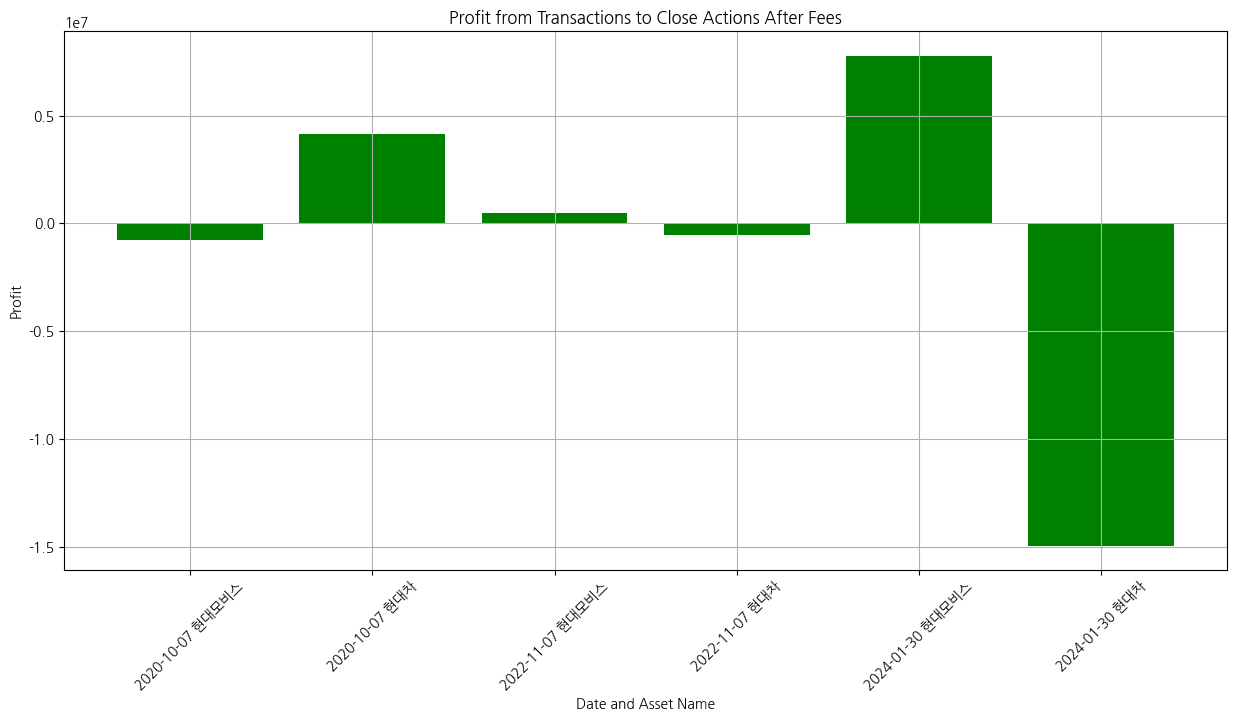

In [ ]:
import pandas as pd

# 데이터 필터링
buy_short_df = position_df[(position_df['action'] == 'buy') | (position_df['action'] == 'sell')]
close_df = position_df[position_df['action'] == 'close']

# 'buy' 및 'short' 데이터에 대한 집계
buy_short_agg = buy_short_df.groupby(['date', 'asset_name', 'action']).agg({
    'quantity': 'sum',  # 총 수량 합계
    'price': 'mean'     # 평균 가격
}).reset_index()

close_agg = close_df.groupby(['date', 'asset_name']).agg({
    'quantity': 'sum',  # 총 수량 합계
    'price': 'mean'     # 평균 가격
}).reset_index()

# 날짜 데이터 타입을 보장하기 위해 변환
buy_short_agg['date'] = pd.to_datetime(buy_short_agg['date'])
close_agg['date'] = pd.to_datetime(close_agg['date'])

# 날짜에 따라 정렬 (merge_asof의 요구사항)
buy_short_agg.sort_values('date', inplace=True)
close_agg.sort_values('date', inplace=True)

# buy_short_agg의 각 행에 대해 date_close 컬럼이 date_trade 이후 가장 가까운 날짜를 갖는 행을 찾아 매칭
matched_df = pd.merge_asof(buy_short_agg, close_agg, on='date', by='asset_name', suffixes=('_trade', '_close'), direction='forward')

# 수익 계산 전, 거래 비용 및 대여 수수료 고려
def calculate_fee(row):
    if row['action'] == 'buy':
        # 매수 (Long) 수수료: 0.125%
        return row['quantity_trade'] * row['price_trade'] * 0.00125
    elif row['action'] == 'sell':
        # 공매도 (Short) 수수료: 1.53%
        return row['quantity_trade'] * row['price_trade'] * 0.0153

matched_df['fee'] = matched_df.apply(calculate_fee, axis=1)

# 수익 계산 (거래시 수수료 반영)
def calculate_profit(row):
    if row['action'] == 'buy':
        # 매수 (Long): (종가 - 매수가) * 수량 - 수수료
        return row['quantity_trade'] * (row['price_close'] - row['price_trade']) - row['fee']
    elif row['action'] == 'sell':
        # 공매도 (Short): (매수가 - 종가) * 수량 - 수수료
        return row['quantity_trade'] * (row['price_trade'] - row['price_close']) - row['fee']

matched_df['profit'] = matched_df.apply(calculate_profit, axis=1)

# 수익 그래프 그리기
plt.figure(figsize=(15, 7))
plt.bar(matched_df['date'].astype(str) + ' ' + matched_df['asset_name'], matched_df['profit'], color='green')
plt.xticks(rotation=45)
plt.title('Profit from Transactions to Close Actions After Fees')
plt.xlabel('Date and Asset Name')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


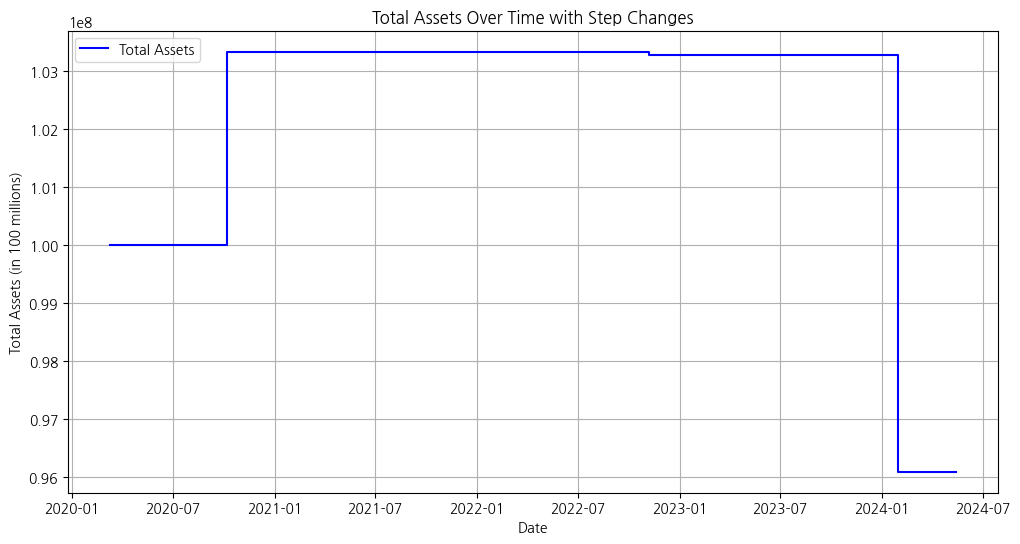

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 날짜별로 수익 합산
daily_profit = matched_df.groupby('date')['profit'].sum().reset_index()

# val_data의 첫 날짜와 마지막 날짜 가져오기
start_date_val = df.index.min()
end_date_val = df.index.max()

# 시작과 끝 날짜 추가
start_date = pd.DataFrame({'date': [pd.Timestamp(start_date_val)], 'profit': [0]})
end_date = pd.DataFrame({'date': [pd.Timestamp(end_date_val)], 'profit': [0]})

# 데이터프레임 병합
daily_profit = pd.concat([start_date, daily_profit, end_date]).reset_index(drop=True)

# 날짜별로 정렬
daily_profit.sort_values('date', inplace=True)

# 날짜별 누적 수익 계산
daily_profit['cumulative_profit'] = daily_profit['profit'].cumsum()

# 초기 자본금 설정
initial_capital = 100000000  # 1억 원

# 기초자산에 누적 수익 더하기
daily_profit['total_assets'] = initial_capital + daily_profit['cumulative_profit']

# 수익 그래프 그리기
plt.figure(figsize=(12, 6))
plt.step(daily_profit['date'], daily_profit['total_assets'], where='post', label='Total Assets', color='blue')
plt.title('Total Assets Over Time with Step Changes')
plt.xlabel('Date')
plt.ylabel('Total Assets (in 100 millions)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# 퍼센트
(daily_profit.iloc[-1]['total_assets'] - 100000000)/100000000*100


-3.903992476524919

In [ ]:
weights

array([1.])

In [ ]:
for i in range(len(selected_results)):
    print(selected_results[i]['columns'])

['현대차', '현대모비스']


---